In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score

In [1]:
model = catalog.load('model')

2022-04-17 20:37:50,916 - kedro.io.data_catalog - INFO - Loading data from `model` (PickleDataSet)...


/home/lilivah/defy/defy/venv/lib/python3.8/site-packages/sklearn/utils/multiclass.py:14: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
/home/lilivah/defy/defy/venv/lib/python3.8/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe2` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1
/home/lilivah/defy/defy/venv/lib/python3.8/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe1` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1


In [7]:
model

RidgeClassifier()

In [12]:
x_test = catalog.load('x_test')
y_test = catalog.load('y_test')

2022-04-17 20:40:47,558 - kedro.io.data_catalog - INFO - Loading data from `x_test` (CSVDataSet)...
2022-04-17 20:40:47,860 - kedro.io.data_catalog - INFO - Loading data from `y_test` (CSVDataSet)...


In [10]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.966583344296803

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[14443,   492],
       [   16,   251]])

In [14]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [15]:
cost = fp*10 + fn*500
print(cost)

12920


#### Cost analysis

In [21]:
yearly_cost = {
    'year': ['2016', '2017', '2018', '2019', '2020']
    , 'cost': ['87000', '113000', '135000', '165000', '187500']
}

yearly_cost = pd.DataFrame(yearly_cost)

In [24]:
x = yearly_cost['year'].to_numpy().astype('float64')
y = yearly_cost['cost'].to_numpy().astype('float64')
x_future = np.array(['2021', '2022', '2023', '2024', '2025']).astype('float64')
x_all = np.array(['2016', '2017','2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']).astype('float64')

In [25]:
m, b = np.polyfit(x, y, 1)
x_future = x + x_future

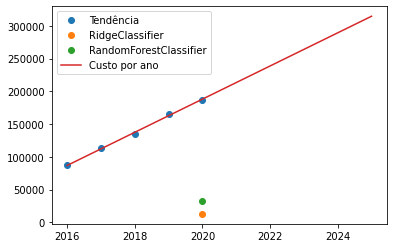

In [41]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label = 'Tendência')
plt.plot(2020, cost, 'o', label = 'RidgeClassifier')
plt.plot(2020, 32500, 'o', label = 'RandomForestClassifier')
plt.plot(x_all, m*x_all + b, label = 'Custo por ano')
plt.legend()